# 준비작업

In [1]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive',force_remount=False)

Mounted at /content/gdrive


In [2]:
# 라이브러리 임포트 

import datetime
import time
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from warnings import simplefilter

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False
from matplotlib.patches import Patch
import seaborn as sns
import statsmodels.api as sm1

from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVC as svc

from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer 

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import ElasticNet
from sklearn.multioutput import MultiOutputRegressor

from sklearn.pipeline import make_pipeline

from matplotlib.colors import ListedColormap

from matplotlib.ticker import MaxNLocator

from scipy import stats
from scipy.stats import randint, uniform

#from category_encoders import OrdinalEncoder
# pip install --upgrade category_encoders

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

import lightgbm as lgb

In [3]:
# Feature engineering 작업이 완료된 csv파일

dataset = pd.read_csv('/content/gdrive/MyDrive/Aiffel Hackathon/colab_dataset/final_featured_dataset_preprocessed_kdy_220606_3.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523098 entries, 0 to 523097
Data columns (total 65 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       523098 non-null  int64  
 1   Date             523098 non-null  object 
 2   Open             523098 non-null  int64  
 3   High             523098 non-null  int64  
 4   Low              523098 non-null  int64  
 5   Close            523098 non-null  int64  
 6   Volume           523098 non-null  float64
 7   signal           523098 non-null  int64  
 8   EMA10            523098 non-null  float64
 9   EMA30            523098 non-null  float64
 10  EMA180           523098 non-null  float64
 11  ROC10            523098 non-null  float64
 12  ROC30            523098 non-null  float64
 13  MOM10            523098 non-null  int64  
 14  MOM30            523098 non-null  int64  
 15  %K10             523098 non-null  float64
 16  %D10             523098 non-null  floa

In [5]:
dataset

,Unnamed: 0,Date,Open,High,Low,Close,Volume,signal,EMA10,EMA30,...,NaverTrend,Kyle_lambda,Amihud_lambda,Hasbrouck_labda,Close_bf_1mim,Close_bf_2mim,Close_bf_3mim,Volume_bf_1mim,Volume_bf_2mim,Volume_bf_3mim
0,0,21-03-23 22:12,2020000,2020000,2019000,2019000,36.582210,0,2017100.864,2014596.329,...,25.36670,30.777662,0.000015,0.000064,2019000.0,2019000.0,2018000.0,17.313993,20.106467,101.666675
1,1,21-03-23 22:13,2020000,2020000,2016000,2016000,63.727452,0,2017446.162,2014880.437,...,25.36670,28.991902,0.000014,0.000059,2019000.0,2019000.0,2019000.0,36.582210,17.313993,20.106467
2,2,21-03-23 22:14,2018000,2020000,2016000,2019000,17.019108,0,2017183.223,2014952.667,...,25.36670,25.666219,0.000013,0.000060,2016000.0,2019000.0,2019000.0,63.727452,36.582210,17.313993
3,3,21-03-23 22:15,2019000,2019000,2018000,2019000,35.570307,0,2017513.546,2015213.785,...,25.36670,34.479842,0.000017,0.000078,2019000.0,2016000.0,2019000.0,17.019108,63.727452,36.582210
4,4,21-03-23 22:16,2019000,2020000,2017000,2018000,45.582501,0,2017783.811,2015458.057,...,25.36670,34.479842,0.000017,0.000078,2019000.0,2019000.0,2016000.0,35.570307,17.019108,63.727452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523093,523093,22-03-23 15:15,3666000,3667000,3665000,3665000,39.688187,0,3665095.394,3659771.930,...,4.68624,48.670278,0.000013,0.000093,3666000.0,3666000.0,3668000.0,8.164602,25.110129,68.150391
523094,523094,22-03-23 15:16,3666000,3669000,3665000,3668000,76.731647,0,3665078.050,3660109.225,...,4.68624,48.124403,0.000013,0.000091,3665000.0,3666000.0,3666000.0,39.688187,8.164602,25.110129
523095,523095,22-03-23 15:17,3668000,3671000,3667000,3669000,96.039465,0,3665609.313,3660618.307,...,4.68624,49.368770,0.000013,0.000094,3668000.0,3665000.0,3666000.0,76.731647,39.688187,8.164602
523096,523096,22-03-23 15:18,3667000,3674000,3663000,3663000,91.949217,0,3666225.802,3661159.062,...,4.68624,49.889389,0.000014,0.000096,3669000.0,3668000.0,3665000.0,96.039465,76.731647,39.688187


In [6]:
dataset.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'signal', 'EMA10', 'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10',
       'MOM30', '%K10', '%D10', '%K30', '%D30', '%K180', '%D180', 'RSI10',
       'RSI30', 'RSI180', 'MA10', 'MA30', 'MA180', 'EMAFast', 'EMASlow',
       'MACD', 'MACDSignal', 'MACDDiff', 'MBB(MA20)', 'HBB', 'LBB', 'PDI',
       'MDI', 'ADX', 'OLCR', 'HCR', 'LCR', 'CLCR', 'VLVR', 'VMA5R', 'VMA10R',
       'VMA20R', 'VMA60R', 'VMA120R', 'BTC_close', 'DXY', 'BTCD',
       'Kimchi_premium', 'S&P500', 'Ethereum DeFi', 'News_freq', 'NaverTrend',
       'Kyle_lambda', 'Amihud_lambda', 'Hasbrouck_labda', 'Close_bf_1mim',
       'Close_bf_2mim', 'Close_bf_3mim', 'Volume_bf_1mim', 'Volume_bf_2mim',
       'Volume_bf_3mim'],
      dtype='object')

In [7]:
# 필요없는 columns 삭제
dataset=dataset.drop(['Unnamed: 0'], axis=1)
dataset.head()

,Date,Open,High,Low,Close,Volume,signal,EMA10,EMA30,EMA180,...,NaverTrend,Kyle_lambda,Amihud_lambda,Hasbrouck_labda,Close_bf_1mim,Close_bf_2mim,Close_bf_3mim,Volume_bf_1mim,Volume_bf_2mim,Volume_bf_3mim
0,21-03-23 22:12,2020000,2020000,2019000,2019000,36.582210,0,2017100.864,2014596.329,2022490.830,...,25.3667,30.777662,0.000015,0.000064,2019000.0,2019000.0,2018000.0,17.313993,20.106467,101.666675
1,21-03-23 22:13,2020000,2020000,2016000,2016000,63.727452,0,2017446.162,2014880.437,2022452.257,...,25.3667,28.991902,0.000014,0.000059,2019000.0,2019000.0,2019000.0,36.582210,17.313993,20.106467
2,21-03-23 22:14,2018000,2020000,2016000,2019000,17.019108,0,2017183.223,2014952.667,2022380.962,...,25.3667,25.666219,0.000013,0.000060,2016000.0,2019000.0,2019000.0,63.727452,36.582210,17.313993
3,21-03-23 22:15,2019000,2019000,2018000,2019000,35.570307,0,2017513.546,2015213.785,2022343.603,...,25.3667,34.479842,0.000017,0.000078,2019000.0,2016000.0,2019000.0,17.019108,63.727452,36.582210
4,21-03-23 22:16,2019000,2020000,2017000,2018000,45.582501,0,2017783.811,2015458.057,2022306.657,...,25.3667,34.479842,0.000017,0.000078,2019000.0,2019000.0,2016000.0,35.570307,17.019108,63.727452


In [8]:
dataset = dataset.set_index('Date')

In [9]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'signal', 'EMA10', 'EMA30',
       'EMA180', 'ROC10', 'ROC30', 'MOM10', 'MOM30', '%K10', '%D10', '%K30',
       '%D30', '%K180', '%D180', 'RSI10', 'RSI30', 'RSI180', 'MA10', 'MA30',
       'MA180', 'EMAFast', 'EMASlow', 'MACD', 'MACDSignal', 'MACDDiff',
       'MBB(MA20)', 'HBB', 'LBB', 'PDI', 'MDI', 'ADX', 'OLCR', 'HCR', 'LCR',
       'CLCR', 'VLVR', 'VMA5R', 'VMA10R', 'VMA20R', 'VMA60R', 'VMA120R',
       'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
       'News_freq', 'NaverTrend', 'Kyle_lambda', 'Amihud_lambda',
       'Hasbrouck_labda', 'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
       'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim'],
      dtype='object')

## 3-2-2. Time-Series Cross Validation 정의

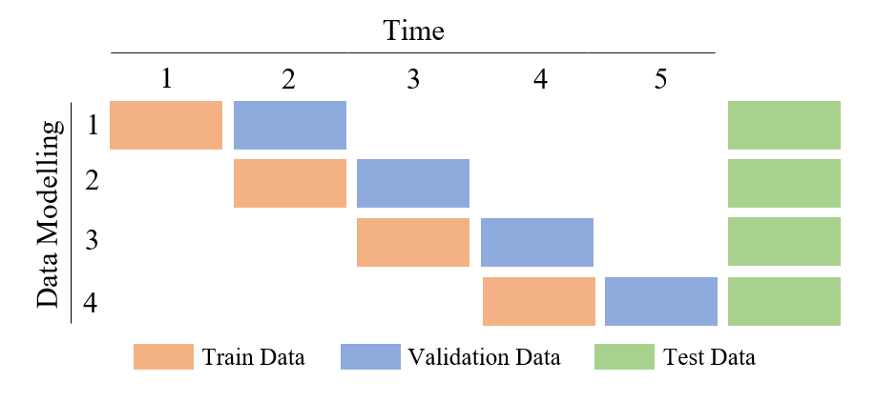

In [10]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.9 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [11]:
btss = BlockingTimeSeriesSplit(n_splits=5)

# 3-3. Learning models

## 3-3-2. Random Forest

### 3-3-2-1. Selecting Features

In [12]:
## Data 100% 사용 
y= dataset["signal"]
X= dataset.loc[:, dataset.columns != 'signal']



# 훈련용 data - 전체 앞시간 70%
X_train = X.iloc[:366000, :]
y_train = y.iloc[:366000]

# 시험용 data - 전체 뒷시간 약 30%
#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)

X_test = X.iloc[366501:, :]
y_test = y.iloc[366501:]

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366000 entries, 21-03-23 22:12 to 21-12-04 0:16
Data columns (total 62 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Open             366000 non-null  int64  
 1   High             366000 non-null  int64  
 2   Low              366000 non-null  int64  
 3   Close            366000 non-null  int64  
 4   Volume           366000 non-null  float64
 5   EMA10            366000 non-null  float64
 6   EMA30            366000 non-null  float64
 7   EMA180           366000 non-null  float64
 8   ROC10            366000 non-null  float64
 9   ROC30            366000 non-null  float64
 10  MOM10            366000 non-null  int64  
 11  MOM30            366000 non-null  int64  
 12  %K10             366000 non-null  float64
 13  %D10             366000 non-null  float64
 14  %K30             366000 non-null  float64
 15  %D30             366000 non-null  float64
 16  %K180            366000

In [14]:

#2 . Random Forest

X_train = X_train[['EMA10','%D10','%K180','RSI180','MACDDiff','PDI','MDI','ADX','OLCR','HCR','LCR','CLCR','VMA5R','VMA10R','VMA60R','BTC_close','DXY','BTCD','Kimchi_premium','S&P500','Ethereum DeFi','News_freq','NaverTrend','Kyle_lambda','Hasbrouck_labda',
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
                                     
X_test = X_test[['EMA10','%D10','%K180','RSI180','MACDDiff','PDI','MDI','ADX','OLCR','HCR','LCR','CLCR','VMA5R','VMA10R','VMA60R','BTC_close','DXY','BTCD','Kimchi_premium','S&P500','Ethereum DeFi','News_freq','NaverTrend','Kyle_lambda','Hasbrouck_labda',
                 'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                 'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]

In [15]:
scaler = StandardScaler().fit(X_train)
X_sclaer= scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test_sclaer= scaler.transform(X_test)

### 3-3-3-2. Random Search and Blocking Time Series Split

In [16]:
rf_clf = RandomForestClassifier('n_jobs=-1')

In [17]:
rf_params = {'n_estimators': randint(10,500),
            'max_features':  ['auto', 'sqrt'],
            'max_depth': [5, 10, 15, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'criterion': ['gini','entropy'],
            'bootstrap': [True, False]}

In [18]:
# pipe_rf = Pipeline([('scaler', sc), ('rf',rf_clf)])  

# ---- 오류남 ----
# Invalid parameter bootstrap for estimator Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [19]:
rf_rand_search = RandomizedSearchCV(estimator = rf_clf,pre_dispatch='2*n_jobs=-1',
                                    param_distributions = rf_params,
                                    cv = btss, scoring = 'f1_macro')

In [20]:
rf_rand_search.fit(X_sclaer, y_train)

RandomizedSearchCV(cv=<__main__.BlockingTimeSeriesSplit object at 0x7f95217b8c10>,
                   estimator=RandomForestClassifier(n_estimators='n_jobs=-1'),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9520c9fd10>},
                   pre_dispatch='2*n_jobs=-1', scoring='f1_macro')

In [21]:
rf_rand_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 203}

In [22]:
print (f'Train Accuracy RF : {rf_rand_search.score(X_sclaer,y_train):.3f}')
print (f'Test Accuracy RF : {rf_rand_search.score(X_test_sclaer,y_test):.3f}')

Train Accuracy RF : 0.990
Test Accuracy RF : 0.421


### 3-3-2-3. 최적의 hyperparameters로 학습하기

In [26]:
rf_clf = RandomForestClassifier(bootstrap=True,
                                criterion='gini',
                                max_depth=20,
                                max_features='sqrt',
                                min_samples_leaf=2,
                                min_samples_split=5,
                                n_estimators=203)
                                

#n_estimators : 모델에서 사용할 트리 갯수(학습시 생성할 트리 갯수)
#criterion : 분할 품질을 측정하는 기능 (default : gini)
#max_depth : 트리의 최대 깊이
#min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
#min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
#min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
#max_features : 각 노드에서 분할에 사용할 특징의 최대 수
#max_leaf_nodes : 리프 노드의 최대수
#min_impurity_decrease : 최소 불순도
#min_impurity_split : 나무 성장을 멈추기 위한 임계치
#bootstrap : 부트스트랩(중복허용 샘플링) 사용 여부
#oob_score : 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부
#n_jobs :적합성과 예측성을 위해 병렬로 실행할 작업 수
#random_state : 난수 seed 설정
#verbose : 실행 과정 출력 여부
#warm_start : 이전 호출의 솔루션을 재사용하여 합계에 더 많은 견적가를 추가
#class_weight : 클래스 가중치

In [27]:
## Model fitting

rf_clf.fit(X_sclaer, y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=203)

In [28]:
## 예측값 저장

y_pred_rf = rf_clf.predict(X_test_sclaer)

### 3-3-2-3. 평가(Evaluation)

In [29]:
'''
    Classification Report

'''

## Define the traget names
target_names = ['Down Day', 'Stay' ,'Up Day']

## Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred_rf, target_names = target_names, output_dict = True)

## Add it to a data frame, transpose it for readability.
rf_report_df = pd.DataFrame(report).transpose()
rf_report_df

,precision,recall,f1-score,support
Down Day,0.516160,0.516890,0.516525,54439.000000
Stay,0.346230,0.175394,0.232837,50053.000000
Up Day,0.443662,0.653296,0.528448,52105.000000
accuracy,0.453125,0.453125,0.453125,0.453125
macro avg,0.435351,0.448527,0.425937,156597.000000
weighted avg,0.437723,0.453125,0.429817,156597.000000


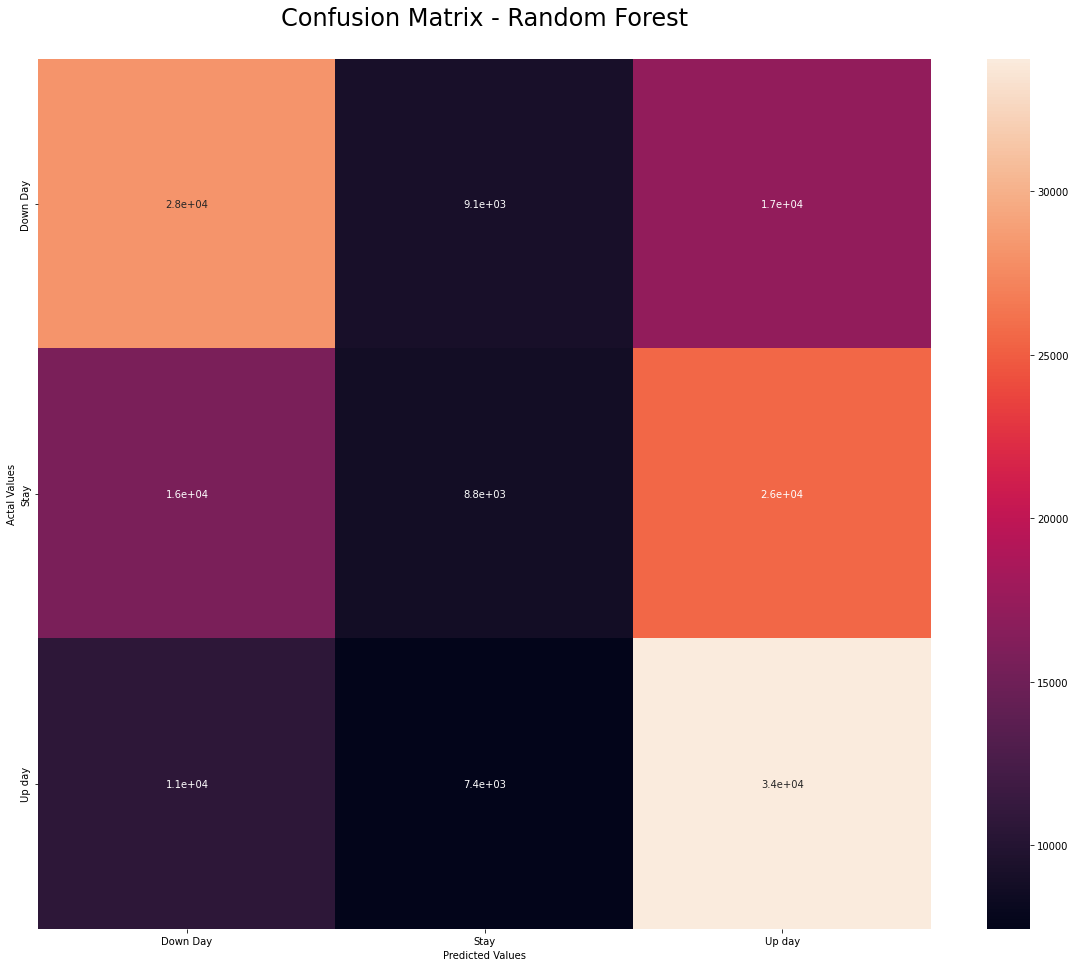

In [30]:
'''
    Confusion Matrix
'''

rf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_matrix

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
rf_matrix_df = pd.DataFrame(rf_matrix,
                              index = ['Down Day','Stay','Up day'], 
                              columns = ['Down Day','Stay','Up day'])

#Plotting the confusion matrix
plt.figure(figsize=(20,16))
sns.heatmap(rf_matrix_df, annot=True)
plt.rc('font', size=20) 
plt.title('Confusion Matrix - Random Forest\n')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [31]:
'''
  * AUC(Area Under the ROC Curve)
  
    ROC curve의 밑면적.   
    0~1까지로 1에 가까울수록 좋은 모델   
    https://koreapy.tistory.com/752

'''


n_classes = 3
#y_score_lgbm = lgbm_clf.predict_proba(X_test)

y_prob_rf = rf_clf.predict_proba(X_test_sclaer)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob_rf, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob_rf, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob_rf, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob_rf, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print('---------------------------------------')
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.627031 (macro),
0.628013 (weighted by prevalence)
---------------------------------------
One-vs-Rest ROC AUC scores:
0.627865 (macro),
0.630176 (weighted by prevalence)


In [32]:
'''
    Feature Importance

      Ensemble Learning의 경우 중요 Feature를 추출할 수 있는 알고리즘이 내장되어 있음
      Feature importance 측정 기준: weight, cover, gain 등
     
'''

# Calculate feature importance and store in pandas series
feature_imp = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp

BTCD               0.091161
RSI180             0.078714
%K180              0.078112
BTC_close          0.068572
DXY                0.068031
EMA10              0.061904
Close_bf_1mim      0.053987
Ethereum DeFi      0.051706
Kimchi_premium     0.050038
Close_bf_2mim      0.049292
Close_bf_3mim      0.046446
News_freq          0.046158
S&P500             0.045057
NaverTrend         0.044300
Kyle_lambda        0.035661
Hasbrouck_labda    0.026087
ADX                0.013316
MACDDiff           0.012280
PDI                0.009869
MDI                0.009714
Volume_bf_1mim     0.009227
Volume_bf_3mim     0.009000
Volume_bf_2mim     0.008669
%D10               0.007878
VMA60R             0.005563
HCR                0.003715
LCR                0.003522
VMA10R             0.003514
CLCR               0.003282
VMA5R              0.003037
OLCR               0.002188
dtype: float64

### 3-3-2-4. 학습결과 저장(백테스팅용)

In [33]:
# 학습모델이 예측한 Label

rf_predicted_label = pd.DataFrame({'RF_Predicted_label':y_pred_rf})
rf_predicted_label

,RF_Predicted_label
0,-1
1,1
2,-1
3,0
4,1
...,...
156592,1
156593,1
156594,1
156595,1


In [34]:
y_prob_rf = rf_clf.predict_proba(X_test_sclaer)
y_prob_rf

array([[0.34232361, 0.32718975, 0.33048664],
       [0.34124808, 0.3136229 , 0.34512902],
       [0.33919375, 0.33070466, 0.33010159],
       ...,
       [0.09749476, 0.25778038, 0.64472486],
       [0.09768759, 0.22751748, 0.67479493],
       [0.1337633 , 0.21338386, 0.65285285]])

In [35]:
column_names = ['RF_Down Day','RF_Stay','RF_Up day']

rf_pred_prob = pd.DataFrame(y_prob_rf, columns=column_names)

In [36]:
rf_pred_prob

,RF_Down Day,RF_Stay,RF_Up day
0,0.342324,0.327190,0.330487
1,0.341248,0.313623,0.345129
2,0.339194,0.330705,0.330102
3,0.325018,0.341422,0.333560
4,0.331513,0.328891,0.339597
...,...,...,...
156592,0.128586,0.266224,0.605190
156593,0.132354,0.249053,0.618592
156594,0.097495,0.257780,0.644725
156595,0.097688,0.227517,0.674795


In [37]:
# Predictied labels과 Prediction probabilities를 합치기

rf_pred_prob_total = pd.merge(rf_predicted_label, rf_pred_prob, left_index=True, right_index=True)
rf_pred_prob_total

,RF_Predicted_label,RF_Down Day,RF_Stay,RF_Up day
0,-1,0.342324,0.327190,0.330487
1,1,0.341248,0.313623,0.345129
2,-1,0.339194,0.330705,0.330102
3,0,0.325018,0.341422,0.333560
4,1,0.331513,0.328891,0.339597
...,...,...,...,...
156592,1,0.128586,0.266224,0.605190
156593,1,0.132354,0.249053,0.618592
156594,1,0.097495,0.257780,0.644725
156595,1,0.097688,0.227517,0.674795


In [38]:
# csv 파일 출력

rf_pred_prob_total.to_csv('/content/gdrive/MyDrive/Feature/RF_Feature selection.csv')